# Divvy bike share case study: How to turn casual riders into annual members

<br>

## Table of Content

1. Introduction
1. Data Collection
    1. Dataset Overview
    1. Data Cleaning
1. Exploratory Data Analysis
1. Conclusion

<br>

## Introduction

This analysis started as a capstone project for Google Analyst Professional Certificate.  
The purpose of this case study is to find insights that can help turn one time users into a yearly member by analyzing Divvy bike ride data.

## Data Collection

Data used has been made available by Motivate Internatinoal Inc. for public use under [this license.](https://www.divvybikes.com/data-license-agreement)

#### A. Dataset Overview

In [1]:
import pandas as pd
from glob import glob
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Let's take a look at one month of the original dataset.

In [2]:
pd.read_csv('./202004-202103-divvy-tripdata/202004-divvy-tripdata.csv')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84771,200E9CDFC5685AA0,docked_bike,2020-04-16 16:10:16,2020-04-16 16:23:11,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,41.8990,-87.6299,41.8990,-87.6299,member
84772,F58A8F2ABCB5D95B,docked_bike,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,41.7996,-87.5947,41.8030,-87.6066,casual
84773,A3754693A80E4913,docked_bike,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,41.9076,-87.6386,41.9032,-87.6343,casual
84774,D610CABB67F7B744,docked_bike,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,41.9201,-87.6779,41.9201,-87.6779,casual


Since we have 12 months of data, and each month is a seperate csv file, let's concatenate all of them into a single dataset.

First, select all the files in the folder with the same pattern using glob()

In [3]:
divvy_trip_data = glob('./202004-202103-divvy-tripdata/*divvy-tripdata.csv')
divvy_trip_data

['./202004-202103-divvy-tripdata/202004-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202005-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202006-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202007-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202008-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202009-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202010-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202011-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202012-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202101-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202102-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202103-divvy-tripdata.csv']

Then use concat to congregate all the data into a single dataframe.

In [4]:
# parser used for changing "started_at" and "ended_at" column into datetime object
d_parser = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
main_df = pd.concat((pd.read_csv(file, parse_dates=['started_at','ended_at'], date_parser = d_parser) for file in divvy_trip_data), ignore_index=True)

#### B. Data Cleaning

There are a few NaN in the data. It seems like they are mainly columns related to "station".

In [5]:
main_df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id      122801
end_station_name      143242
end_station_id        143703
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [6]:
nan_df = main_df[main_df.isna().any(axis=1)]

In [7]:
main_df.rideable_type.value_counts()

docked_bike      2558469
electric_bike     611406
classic_bike      319873
Name: rideable_type, dtype: int64

In [8]:
nan_df.rideable_type.value_counts()

electric_bike    189620
docked_bike        4178
classic_bike       1259
Name: rideable_type, dtype: int64

Significant portion of missing value's from electric_bike.
This is because electric_bike can be parked anywhere, not necessarily at a docking station.

In [9]:
195057 / 3489748 * 100

5.589429380001078

The original data had 3489748 rows and the data with no NaN has 3294691 rows.

Since the eliminated data is mere 5.5%, and electric bikes serve the exact same purpose as any other types of bikes, we will continue to analysis without considering the rows with NaN.

Use dropna() to delete all rows with NaN value.

In [10]:
main_df.dropna(inplace=True)

<br>

We'll create a column named "ride_length." This column can be calculated by subtracting the column "started_at" from the column "ended_at."

In [11]:
main_df['ride_length'] = main_df['ended_at'] - main_df['started_at']

Also, let's convert ride_length's unit to minute

In [12]:
main_df['ride_length'] = main_df['ride_length'].dt.seconds//60

If ride_length is more than 80 min, we'll consider it unreturned, and delete these outliars.

In [13]:
main_df.drop(main_df.loc[main_df['ride_length'] > 80].index, inplace=True)

Next, we'll create a column named “day_of_week.” where Monday=0, and Sunday=6.

In [14]:
main_df['day_of_week'] = main_df.started_at.dt.dayofweek

<br>

### Exploratory Data Analysis

In [15]:
plt.style.use(['seaborn-notebook'])

In [16]:
# Compare members and casual users's ride_length

member_ride_length = main_df.loc[main_df.member_casual == 'member'].ride_length
casual_ride_length = main_df.loc[main_df.member_casual == 'casual'].ride_length

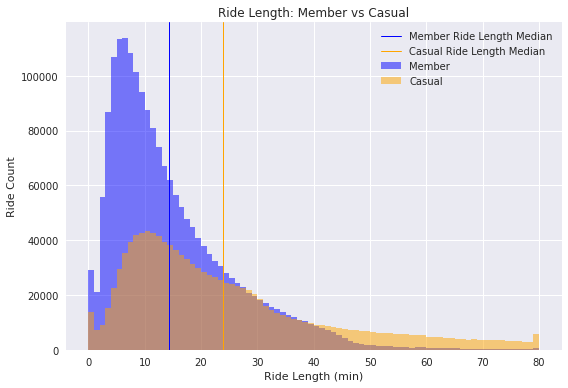

In [21]:
plt.hist(member_ride_length, bins=80, alpha=0.5, label='Member', color='blue')
plt.hist(casual_ride_length, bins=80, alpha=0.5, label='Casual', color='orange')
plt.axvline(member_ride_length.mean(), color='blue', label='Member Ride Length Median', linewidth=1)
plt.axvline(casual_ride_length.mean(), color='orange', label='Casual Ride Length Median', linewidth=1)
plt.legend(loc='upper right')

plt.title('Ride Length: Member vs Casual')
plt.xlabel('Ride Length (min)')
plt.ylabel('Ride Count')
plt.tight_layout()

Casual riders tend to ride longer with the median of ~24 min as opposed to members with median of ~14 min

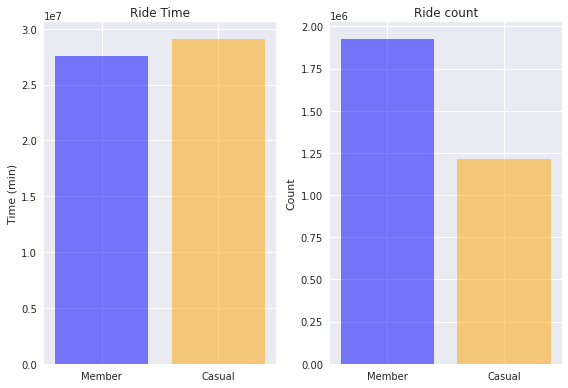

In [22]:
objects = ('Member','Casual')
y_pos = np.arange(len(objects))
val1 = [member_ride_length.sum(),casual_ride_length.sum()]
val2 = [member_ride_length.count(), casual_ride_length.count()]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 

ax1.bar(objects,val1, alpha=0.5, color=['blue','orange'])
ax1.set_ylabel('Time (min)')
ax1.set_title('Ride Time');

ax2.bar(objects,val2, alpha=0.5, color=['blue','orange'])
ax2.set_ylabel('Count')
ax2.set_title('Ride count');

plt.tight_layout()
plt.style.use(['seaborn'])

In [23]:
c = casual_ride_length.count()
m = member_ride_length.count()
(m - c) / m

0.36859856663923907

The causal riders have higher cumulative ride time compared to the members by a small margin, but the mebers ride 37% more frequently than the casual riders.

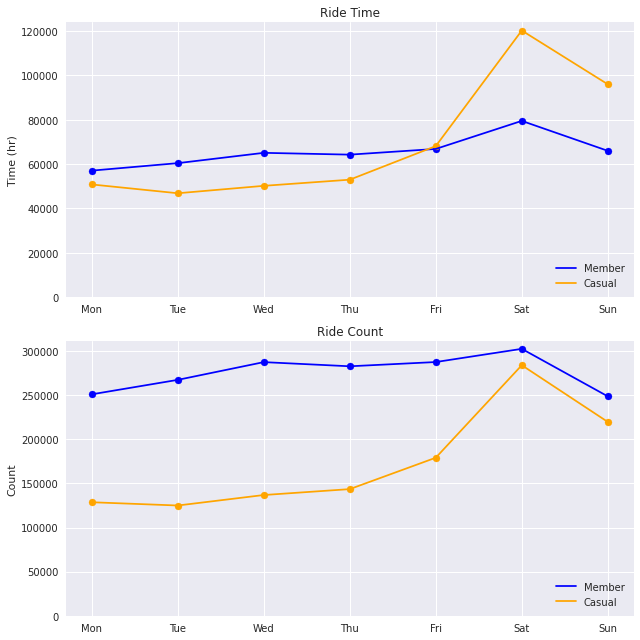

In [24]:
# group by day of week and compare ride length of member and casual

member_ride_length_df = main_df.loc[main_df.member_casual == 'member']
casual_ride_length_df = main_df.loc[main_df.member_casual == 'casual']

member_ride_length_series = member_ride_length_df.groupby(['day_of_week']).sum().ride_length
casual_ride_length_series = casual_ride_length_df.groupby(['day_of_week']).sum().ride_length
df_rl_wk = pd.concat([member_ride_length_series, casual_ride_length_series], axis=1)
df_rl_wk.columns = ['member', 'casual']
# changing min to hr
df_rl_wk['member'] = [x/60 for x in df_rl_wk['member']]
df_rl_wk['casual'] = [x/60 for x in df_rl_wk['casual']]

rl_wk = df_rl_wk.values
mem_rl = rl_wk[:,0]
cas_rl = rl_wk[:,1]

member_ride_count_series = member_ride_length_df.groupby(['day_of_week']).count().ride_id
casual_ride_count_series = casual_ride_length_df.groupby(['day_of_week']).count().ride_id
df_ct_wk = pd.concat([member_ride_count_series, casual_ride_count_series], axis=1)
df_ct_wk.columns = ['member', 'casual']

ct_wk = df_ct_wk.values
mem_ct = ct_wk[:,0]
cas_ct = ct_wk[:,1]

ind = np.arange(len(df_rl_wk))

fig_wk, ax = plt.subplots(figsize=(9,9), nrows=2, ncols=1)

rects1_1 = ax[0].scatter(ind, mem_rl, color='blue')
rects1_2 = ax[0].plot(ind, mem_rl, color='blue')
rects2_1 = ax[0].scatter(ind, cas_rl, color='orange')
rects2_2 = ax[0].plot(ind, cas_rl, color ='orange')

ax[0].set_title('Ride Time')
ax[0].set_ylabel('Time (hr)')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
ax[0].legend((rects1_2[0], rects2_2[0]), ('Member', 'Casual'), loc=4)
ax[0].set_ylim(bottom=0)

rects3_1 = ax[1].scatter(ind, mem_ct, color='blue')
rects3_2 = ax[1].plot(ind ,mem_ct, color='blue')
rects4_1 = ax[1].scatter(ind, cas_ct, color='orange')
rects4_2 = ax[1].plot(ind, cas_ct, color ='orange')

ax[1].set_title('Ride Count')
ax[1].set_ylabel('Count')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[1].legend((rects3_2[0], rects4_2[0]), ('Member', 'Casual'), loc=4)
ax[1].set_ylim(bottom=0)

plt.tight_layout()

Sorted by weekdays, cumulative ride length and ride count between the members and the casual riders show interesting difference.

<br>

## Conclusion

While the members' ride length stays relatively constant, the casual riders' ride time is significantly higher during the weekend. We can hypothesize that this is due to the majority of the casual riders being tourists. This hypothesis is further backed up by the ride count. While the members' ride count stay relatively consistant since members are most likely Chicago residents using bikes to commute, casual riders' ridecount is low during the weekdays and high during the weekend.

Tourists are not the main targets riders for membership conversion since they are most likely from out of town, and Divvy bike only services in Chicago.

Our stategy should focus on targeting those who consistantly ride during the weekdays.

Casual riders who ride at least 15 seperate days in a month should be our  target customers.  
Also, within those riders, pay special attention to those who exibit commuter pattern by consistantly repeating the start station and the end station.